## 데이터 준비

In [2]:
import pandas as pd

df = pd.DataFrame(columns=['calory', 'breakfast', 'lunch', 'dinner', 'exercise', 'body_shape'])
df.loc[0] = [1200, 1, 0, 0, 2, 'Skinny']
df.loc[1] = [2800, 1, 1, 1, 1, 'Normal']
df.loc[2] = [3500, 2, 2, 1, 0, 'Fat']
df.loc[3] = [1400, 0, 1, 0, 3, 'Skinny']
df.loc[4] = [5000, 2, 2, 2, 0, 'Fat']
df.loc[5] = [1300, 0, 0, 1, 2, 'Skinny']
df.loc[6] = [3000, 1, 0, 1, 1, 'Normal']
df.loc[7] = [4000, 2, 2, 2, 0, 'Fat']
df.loc[8] = [2600, 0, 2, 0, 0, 'Normal']
df.loc[9] = [3000, 1, 2, 1, 1, 'Fat']
df.head(10)

,calory,breakfast,lunch,dinner,exercise,body_shape
0,1200,1,0,0,2,Skinny
1,2800,1,1,1,1,Normal
2,3500,2,2,1,0,Fat
3,1400,0,1,0,3,Skinny
4,5000,2,2,2,0,Fat
5,1300,0,0,1,2,Skinny
6,3000,1,0,1,1,Normal
7,4000,2,2,2,0,Fat
8,2600,0,2,0,0,Normal
9,3000,1,2,1,1,Fat


In [3]:
# split data and label
X = df[['calory', 'breakfast', 'lunch', 'dinner', 'exercise']]
Y = df[['body_shape']]

## 공분산(상관계수)을 활용해서 Eigen Vector 구하기

In [4]:
import numpy as np
from sklearn.preprocessing import StandardScaler

# Scaling : 변수들의 스케일이 다를 때, 같은 범위로 조정해주는 정규화(Normalization) 방법
# StandardScaler : 평균0, 분산1로 조정
x_std = StandardScaler().fit_transform(X)
x_std

array([[-1.35205803,  0.        , -1.3764944 , -1.28571429,  1.        ],
       [ 0.01711466,  0.        , -0.22941573,  0.14285714,  0.        ],
       [ 0.61612771,  1.29099445,  0.91766294,  0.14285714, -1.        ],
       [-1.18091145, -1.29099445, -0.22941573, -1.28571429,  2.        ],
       [ 1.89972711,  1.29099445,  0.91766294,  1.57142857, -1.        ],
       [-1.26648474, -1.29099445, -1.3764944 ,  0.14285714,  1.        ],
       [ 0.18826125,  0.        , -1.3764944 ,  0.14285714,  0.        ],
       [ 1.04399418,  1.29099445,  0.91766294,  1.57142857, -1.        ],
       [-0.15403193, -1.29099445,  0.91766294, -1.28571429, -1.        ],
       [ 0.18826125,  0.        ,  0.91766294,  0.14285714,  0.        ]])

In [34]:
features = x_std.T
cov_matrix = np.cov(features)
cov_matrix

array([[ 1.11111111,  0.88379717,  0.76782385,  0.89376551, -0.93179808],
       [ 0.88379717,  1.11111111,  0.49362406,  0.81967902, -0.71721914],
       [ 0.76782385,  0.49362406,  1.11111111,  0.40056715, -0.76471911],
       [ 0.89376551,  0.81967902,  0.40056715,  1.11111111, -0.63492063],
       [-0.93179808, -0.71721914, -0.76471911, -0.63492063,  1.11111111]])

In [36]:
# Eigen 벡터와 Eigen 밸류를 구하는 함수
eig_vals, eig_vecs = np.linalg.eig(cov_matrix)
print(f"Eigen Vectors \n {eig_vecs} \nEigen Values \n {eig_vals}")

Eigen Vectors 
 [[-0.508005   -0.0169937  -0.84711404  0.11637853  0.10244985]
 [-0.44660335 -0.36890361  0.12808055 -0.63112016 -0.49973822]
 [-0.38377913  0.70804084  0.20681005 -0.40305226  0.38232213]
 [-0.42845209 -0.53194699  0.3694462   0.22228235  0.58954327]
 [ 0.46002038 -0.2816592  -0.29450345 -0.61341895  0.49601841]] 
Eigen Values 
 [4.0657343  0.8387565  0.07629538 0.27758568 0.2971837 ]


In [11]:
# 위의 Eigen Values 값을 보면 첫번째 차원의 값이 4.06임
# 0번째 차원만 사용해서 Projection 해도 데이터 간 거리가 꽤 유지된다는 뜻인데
# 얼마나 유지되는지 수치로 확인해보면 73%가 나옴

eig_vals[0] / sum(eig_vals)

0.7318321731427543

## Eigen Vector를 골라서 Projection 하기

In [12]:
# 행렬곱을 위해 Transpose 후 계산
# 0번째 차원을 선택했음
# projected_X : 사영된 후의 X 데이터 값들

projected_X = x_std.dot(eig_ves.T[0])
projected_X

array([ 2.22600943,  0.0181432 , -1.76296611,  2.73542407, -3.02711544,
        2.14702579,  0.37142473, -2.59239883,  0.39347815, -0.50902498])

In [14]:
# 다시 데이터프레임으로 묶어보면

df_rst = pd.DataFrame(columns=['PC1', 'y-axis', 'label'])
df_rst['PC1'] = projected_X
df_rst['y-axis'] = 0.0
df_rst['label'] = Y

df_rst.head(10)

,PC1,y-axis,label
0,2.226009,0.0,Skinny
1,0.018143,0.0,Normal
2,-1.762966,0.0,Fat
3,2.735424,0.0,Skinny
4,-3.027115,0.0,Fat
5,2.147026,0.0,Skinny
6,0.371425,0.0,Normal
7,-2.592399,0.0,Fat
8,0.393478,0.0,Normal
9,-0.509025,0.0,Fat


## 결과 시각화

Text(0.5, 1.0, 'PCA result')

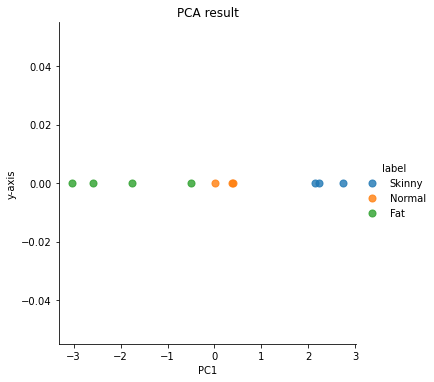

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.lmplot(x='PC1', y='y-axis', data=df_rst, fit_reg=False,  # x축, y축, 데이터, line유무
           scatter_kws={"s":50}, # marker 사이즈
           hue="label") #color 분류 기준
plt.title("PCA result")

## Scikit-Learn으로 PCA 하기

준비된 데이터를 정규화한 후, PCA알고리즘 적용만 하면 끝

In [38]:
from sklearn import decomposition

pca = decomposition.PCA(n_components=2)  # PCA 객체 선언 (결과의 차원 수는 1로 설정)
pca_x = pca.fit_transform(x_std) # X 데이터에 PCA 알고리즘 적용
pca_x = pca_x.T  #이유는 모르겠지만 Transpose해야 맞게 나옴
pca_x

array([[-2.22600943, -0.0181432 ,  1.76296611, -2.73542407,  3.02711544,
        -2.14702579, -0.37142473,  2.59239883, -0.39347815,  0.50902498],
       [-0.54936514, -0.23871898,  0.36868681,  0.4544983 , -0.41305057,
        -0.83449111, -1.05380594, -0.3985085 ,  2.09420397,  0.57055116]])

결과를 데이터프레임에 넣고 시각화

In [40]:
sk_rst = pd.DataFrame(columns=['PC1', 'PC2', 'y-axis', 'label'])
sk_rst['PC1'] = pca_x[0]
sk_rst['PC2'] = pca_x[1]
sk_rst['y-axis'] = 0.0
sk_rst['label'] = Y

sk_rst.head(10)

,PC1,PC2,y-axis,label
0,-2.226009,-0.549365,0.0,Skinny
1,-0.018143,-0.238719,0.0,Normal
2,1.762966,0.368687,0.0,Fat
3,-2.735424,0.454498,0.0,Skinny
4,3.027115,-0.413051,0.0,Fat
5,-2.147026,-0.834491,0.0,Skinny
6,-0.371425,-1.053806,0.0,Normal
7,2.592399,-0.398508,0.0,Fat
8,-0.393478,2.094204,0.0,Normal
9,0.509025,0.570551,0.0,Fat


In [41]:
sns.lmplot(x='PC1', y='PC2', z='y-axis', data=sk_rst, fit_reg=False,  # x축, y축, 데이터, line유무
           scatter_kws={"s":50}, # marker 사이즈
           hue="label") #color 분류 기준
plt.title("PCA result")

TypeError: lmplot() got an unexpected keyword argument 'z'